# 1. Import libraries and load dataset

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load preprocessed dataset
df = pd.read_csv("../data/imdb_reviews.csv")
df.head()

,review,label
0,"""Porgy & Bess"" was the very first movie my par...",1
1,The 1960's TV series Bewitched owes it's idea ...,1
2,When I first got my N64 when I was five or six...,1
3,I grew up on this movie and I can remember whe...,1
4,this is a dreadful adaption of Charles Kingsle...,0


# 2. Data splitting

In [3]:
# 2. Split into features and target
X = df['review']
y = df['label']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 3. Text vectorization (TF-IDF)

In [4]:
# 3. Convert text into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# 4. Train logistic regression model

In [5]:
# 4. Train the classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 5. Evaluate the model

In [6]:
# 5. Evaluate performance
y_pred = model.predict(X_test_vec)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5000
           1       0.88      0.91      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# 6. Confusion matrix visualization

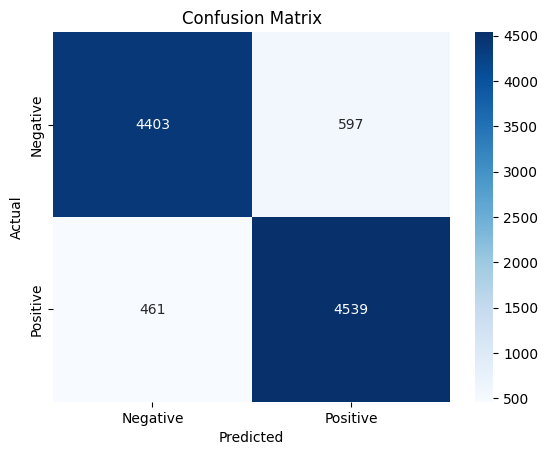

In [7]:
# 6. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 7. Save model and vectorizer

In [8]:
# 7. Save model and vectorizer to disk
os.makedirs("../model", exist_ok=True)

joblib.dump(model, "../model/model.joblib")
joblib.dump(vectorizer, "../model/vectorizer.joblib")

print("✅ Model and vectorizer saved.")


✅ Model and vectorizer saved.
